# Data importing and inspection

In [192]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [193]:
df=pd.read_csv('D:\study\data\Lead Scoring Assignment\Leads.csv')

In [194]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- Inspecting null vlaue percentage

In [196]:
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [197]:
df.shape

(9240, 37)

# Data cleaning

In [198]:
df.duplicated().sum()

0

- 0 Duplicate values Found

##### Dropping columns having Null value greater than 40 % 

In [199]:
cols=df.isnull().sum()/df.shape[0]*100
cols=cols[cols>40]

In [200]:
cols.index

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [201]:
df.drop(cols.index,axis=1,inplace=True)

In [202]:
df.shape

(9240, 32)

In [203]:
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [204]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
WeLearn                 1
youtubechannel          1
NC_EDM                  1
blog                    1
Pay per Click Ads       1
testone                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

- google is appearing, twice. Hence replacing it with single value

In [205]:
df.loc[df['Lead Source']=='google','Lead Source']='Google'

- Since only few rows are missing(.38%) the value and the values are equally distributed,we can delete the rows having Lead source as null

In [206]:
df[df['Lead Source'].isnull()==True].shape

(36, 32)

In [207]:
df.shape

(9240, 32)

- Deleting 36 rows since it's not gonna impact our analysis

In [208]:
df=df.loc[df['Lead Source'].notnull()]

- Continuing with our analysis of null values

In [209]:
df['TotalVisits'].median()

3.0

- Replacing null values of Total visits with its median

In [210]:
df.loc[df['TotalVisits'].isnull(),'TotalVisits']=3.0

- Converting TotalVisits to int since its value can't be float

In [211]:
df['TotalVisits']=df['TotalVisits'].astype('int64')

In [212]:
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.412429
Last Activity                                     1.097349
Country                                          26.358105
Specialization                                   15.623642
How did you hear about X Education               23.978705
What is your current occupation                  29.226423
What matters most to you in choosing a course    29.432855
Search                                            0.0000

In [213]:
df['Page Views Per Visit'].value_counts().sort_index()

0.00     2161
1.00      651
1.14        2
1.17        1
1.19        1
         ... 
14.50       1
15.00       4
16.00       3
24.00       1
55.00       1
Name: Page Views Per Visit, Length: 114, dtype: int64

- Other than 1 outlier, everything seems fine. Replacing the null value of Page views per visit with its median

In [214]:
df.loc[df['Page Views Per Visit'].isnull(),'Page Views Per Visit']=df['Page Views Per Visit'].median()

In [215]:
df['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [216]:
df.loc[df['Converted']==1,'Last Activity'].value_counts()

SMS Sent                        1706
Email Opened                    1250
Page Visited on Website          151
Olark Chat Conversation           84
Email Link Clicked                73
Converted to Lead                 54
Unreachable                       31
Form Submitted on Website         28
Email Bounced                     24
Had a Phone Conversation          22
Unsubscribed                      14
Approached upfront                 9
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
View in browser link Clicked       1
Name: Last Activity, dtype: int64

In [217]:
df.loc[df['Last Activity'].isnull(),'Converted'].value_counts()

1    80
0    21
Name: Converted, dtype: int64

- Since most of the rows that have null Last activity have been converted into successful leads and Most of the successful leads have their Last Activity as 'SMS Sent', hence replacing null 'Last activity' with 'SMS Sent'

In [218]:
df.loc[df['Last Activity'].isnull(),'Last Activity']='SMS Sent'

In [219]:
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                          26.358105
Specialization                                   15.623642
How did you hear about X Education               23.978705
What is your current occupation                  29.226423
What matters most to you in choosing a course    29.432855
Search                                            0.0000

- Moving onto Country column

In [220]:
df['Country'].value_counts()

India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Kuwait                     4
Canada                     4
Germany                    4
South Africa               4
Sweden                     3
Ghana                      2
Asia/Pacific Region        2
Uganda                     2
Belgium                    2
China                      2
Italy                      2
Bangladesh                 2
Philippines                2
Netherlands                2
Denmark                    1
Malaysia                   1
Switzerland                1
Indonesia                  1
Kenya                      1
Tanzania                   1
Vietnam       

In [221]:
df['Country'].value_counts()/df.shape[0]*100

India                   70.523685
United States            0.749674
United Arab Emirates     0.575837
Singapore                0.260756
Saudi Arabia             0.228162
United Kingdom           0.162973
Australia                0.141243
Qatar                    0.108648
Hong Kong                0.076054
Bahrain                  0.076054
Oman                     0.065189
France                   0.065189
unknown                  0.054324
Nigeria                  0.043459
Kuwait                   0.043459
Canada                   0.043459
Germany                  0.043459
South Africa             0.043459
Sweden                   0.032595
Ghana                    0.021730
Asia/Pacific Region      0.021730
Uganda                   0.021730
Belgium                  0.021730
China                    0.021730
Italy                    0.021730
Bangladesh               0.021730
Philippines              0.021730
Netherlands              0.021730
Denmark                  0.010865
Malaysia      

- India accounts for more than 70 % of the column and with 26 % values missing,there is no need for the column. Dropping the column

In [222]:
df.drop(columns=['Country'],inplace=True)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9204 non-null   object 
 1   Lead Number                                    9204 non-null   int64  
 2   Lead Origin                                    9204 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9204 non-null   object 
 5   Do Not Call                                    9204 non-null   object 
 6   Converted                                      9204 non-null   int64  
 7   TotalVisits                                    9204 non-null   int64  
 8   Total Time Spent on Website                    9204 non-null   int64  
 9   Page Views Per Visit                           9204 

- Taking care of Specialization

In [224]:
df['Specialization'].value_counts()

Select                               1914
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [225]:
(df['Specialization'].value_counts()/len(df)*100)

Select                               20.795306
Finance Management                   10.571491
Human Resource Management             9.202521
Marketing Management                  9.093872
Operations Management                 5.454150
Business Administration               4.378531
IT Projects Management                3.976532
Supply Chain Management               3.791830
Banking, Investment And Insurance     3.672316
Travel and Tourism                    2.205563
Media and Advertising                 2.205563
International Business                1.933942
Healthcare Management                 1.716645
Hospitality Management                1.238592
E-COMMERCE                            1.205997
Retail Management                     1.086484
Rural and Agribusiness                0.793133
E-Business                            0.619296
Services Excellence                   0.434594
Name: Specialization, dtype: float64

###### Select value is nothing but no option chosen and is as good as Null value .If we add this to the null values already present(15%) then total null value adds upto 35%. Hence replacing the null value and Select value with 'Not Available'

In [226]:
df.loc[(df['Specialization'].isnull()) | (df['Specialization']=='Select'),'Specialization']='Not Available'

In [227]:
(df['Specialization'].value_counts()/len(df)*100)

Not Available                        36.418948
Finance Management                   10.571491
Human Resource Management             9.202521
Marketing Management                  9.093872
Operations Management                 5.454150
Business Administration               4.378531
IT Projects Management                3.976532
Supply Chain Management               3.791830
Banking, Investment And Insurance     3.672316
Media and Advertising                 2.205563
Travel and Tourism                    2.205563
International Business                1.933942
Healthcare Management                 1.716645
Hospitality Management                1.238592
E-COMMERCE                            1.205997
Retail Management                     1.086484
Rural and Agribusiness                0.793133
E-Business                            0.619296
Services Excellence                   0.434594
Name: Specialization, dtype: float64

In [228]:
df['How did you hear about X Education'].value_counts()

Select                   5009
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [229]:
df['How did you hear about X Education'].value_counts()/len(df)*100

Select                   54.421990
Online Search             8.778792
Word Of Mouth             3.770100
Student of SomeSchool     3.368101
Other                     2.020860
Multiple Sources          1.651456
Advertisements            0.760539
Social Media              0.717080
Email                     0.282486
SMS                       0.249891
Name: How did you hear about X Education, dtype: float64

###### Select value is nothing but no option chosen and is as good as Null value .If we add this to the null values already present(23%) then total null value adds upto 78%. Hence dropping the column

In [230]:
df.drop(columns=['How did you hear about X Education'],inplace=True)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9204 non-null   object 
 1   Lead Number                                    9204 non-null   int64  
 2   Lead Origin                                    9204 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9204 non-null   object 
 5   Do Not Call                                    9204 non-null   object 
 6   Converted                                      9204 non-null   int64  
 7   TotalVisits                                    9204 non-null   int64  
 8   Total Time Spent on Website                    9204 non-null   int64  
 9   Page Views Per Visit                           9204 

In [232]:
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Specialization                                    0.000000
What is your current occupation                  29.226423
What matters most to you in choosing a course    29.432855
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [233]:
df['What is your current occupation'].value_counts()

Unemployed              5567
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [234]:
df['What is your current occupation'].value_counts()/df['What is your current occupation'].value_counts().sum()*100

Unemployed              85.462082
Working Professional    10.807492
Student                  3.208474
Other                    0.245625
Housewife                0.153516
Businessman              0.122812
Name: What is your current occupation, dtype: float64

- More than 80 % of people who have applied for the course and whose information is available are unemployed, hence replacing the null values with 'Unemployed'

In [235]:
df.loc[df['What is your current occupation'].isnull(),'What is your current occupation']='Unemployed'

In [236]:
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Specialization                                    0.000000
What is your current occupation                   0.000000
What matters most to you in choosing a course    29.432855
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [237]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6492
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

###### More than 99 % of info available is 'better career prospects'. Hence deleting the column

In [238]:
df.drop(columns=['What matters most to you in choosing a course'],inplace=True)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9204 non-null   object 
 1   Lead Number                               9204 non-null   int64  
 2   Lead Origin                               9204 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9204 non-null   object 
 5   Do Not Call                               9204 non-null   object 
 6   Converted                                 9204 non-null   int64  
 7   TotalVisits                               9204 non-null   int64  
 8   Total Time Spent on Website               9204 non-null   int64  
 9   Page Views Per Visit                      9204 non-null   float64
 10  Last Activity                       

In [240]:
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.000000
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  0.000000
Total Time Spent on Website                  0.000000
Page Views Per Visit                         0.000000
Last Activity                                0.000000
Specialization                               0.000000
What is your current occupation              0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement       

In [241]:
df['City'].value_counts()

Mumbai                         3220
Select                         2218
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

In [242]:
df['City'].value_counts()/len(df)*100

Mumbai                         34.984789
Select                         24.098218
Thane & Outskirts               8.159496
Other Cities                    7.453281
Other Cities of Maharashtra     4.954368
Other Metro Cities              4.117775
Tier II Cities                  0.803998
Name: City, dtype: float64

###### Select value is nothing but no option chosen and is as good as Null value .If we add this to the null values already present(15%) then total null value adds upto 40%. Hence dropping the column

In [243]:
df.drop(columns=['City'],inplace=True)

In [244]:
df['Lead Profile'].value_counts()/len(df)*100

Select                         44.708822
Potential Lead                 17.470665
Other Leads                     5.291178
Student of SomeSchool           2.618427
Lateral Student                 0.260756
Dual Specialization Student     0.217297
Name: Lead Profile, dtype: float64


###### Taking the similar approach we took for City column ,hence dropping the column

In [245]:
df.drop(columns=['Lead Profile'],inplace=True)

In [246]:
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                  0.0000
Lead Number                                  0.0000
Lead Origin                                  0.0000
Lead Source                                  0.0000
Do Not Email                                 0.0000
Do Not Call                                  0.0000
Converted                                    0.0000
TotalVisits                                  0.0000
Total Time Spent on Website                  0.0000
Page Views Per Visit                         0.0000
Last Activity                                0.0000
Specialization                               0.0000
What is your current occupation              0.0000
Search                                       0.0000
Magazine                                     0.0000
Newspaper Article                            0.0000
X Education Forums                           0.0000
Newspaper                                    0.0000
Digital Advertisement                        0.0000
Through Reco

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9204 non-null   object 
 1   Lead Number                               9204 non-null   int64  
 2   Lead Origin                               9204 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9204 non-null   object 
 5   Do Not Call                               9204 non-null   object 
 6   Converted                                 9204 non-null   int64  
 7   TotalVisits                               9204 non-null   int64  
 8   Total Time Spent on Website               9204 non-null   int64  
 9   Page Views Per Visit                      9204 non-null   float64
 10  Last Activity                       

In [248]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0,0,0.0,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5,674,2.5,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2.0,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1,305,1.0,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2,1428,1.0,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


- Since We have already assigned Lead Number to leads , we don't need the prospect Id

In [249]:
df.drop(columns=['Prospect ID'],inplace=True)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9204 non-null   int64  
 1   Lead Origin                               9204 non-null   object 
 2   Lead Source                               9204 non-null   object 
 3   Do Not Email                              9204 non-null   object 
 4   Do Not Call                               9204 non-null   object 
 5   Converted                                 9204 non-null   int64  
 6   TotalVisits                               9204 non-null   int64  
 7   Total Time Spent on Website               9204 non-null   int64  
 8   Page Views Per Visit                      9204 non-null   float64
 9   Last Activity                             9204 non-null   object 
 10  Specialization                      

#### Since Tags is a score variable, we don't need it for our analysis

In [251]:
df.drop(columns=['Tags'],inplace=True)

In [252]:
object_col=df.select_dtypes(include=['object']).columns

In [253]:
for c in object_col:
    print('######### {0} #########'.format(c))
    print(df[c].value_counts())
    print('---------------------------------------------')

######### Lead Origin #########
Landing Page Submission    4885
API                        3580
Lead Add Form               685
Lead Import                  54
Name: Lead Origin, dtype: int64
---------------------------------------------
######### Lead Source #########
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
youtubechannel          1
WeLearn                 1
NC_EDM                  1
blog                    1
Pay per Click Ads       1
testone                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64
---------------------------------------------
######### Do Not Email #########
No     8483
Yes     721
Name: Do Not Email, dtype: int64
------------------------------------------

- Most of the values have only single value or higly skewed values(99% or more rows have the same value). Deleting such columns . For variables that have fewer occurance of a value , we will be clubbing those values

- columns with 99% or more skewness are
  
  1)Search
  
  2)Magazine 
  
  3)Newspaper Article
  
  4)Education Forums
  
  5)Newspaper
  
  6)Digital Advertisement
  
  7)Through Recommendations
  
  8)Receive More Updates About Our Courses
  
  9)Update me on Supply Chain Content
  
  10)Get updates on DM Content
  
  11)I agree to pay the amount through cheque
  
  12)Do Not Call

In [254]:
#dropping columns with skewness
df.drop(columns=['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Do Not Call'],inplace=True)

###### clubbing values

- Clubbing Lead Source

In [255]:
#values having occurances 55 or fewer will be clubbed into a single variable 'Others'
cols=df['Lead Source'].value_counts()<=55
df.loc[df['Lead Source'].isin(list(cols[cols].index)),'Lead Source']='Others'

- Clubbing Last Activity

In [256]:
cols=df['Last Activity'].value_counts()<=93
df.loc[df['Last Activity'].isin(list(cols[cols].index)),'Last Activity']='Others'

- Clubbing Last Notable Activity

In [257]:
cols=df['Last Notable Activity'].value_counts()<=60
df.loc[df['Last Notable Activity'].isin(list(cols[cols].index)),'Last Notable Activity']='Others'

- Clubbing Specialization

In [258]:
cols=df['Specialization'].value_counts()<=114
df.loc[df['Specialization'].isin(list(cols[cols].index)),'Specialization']='Others'

- CLubbing 'What is your current occupation

In [259]:
cols=df['What is your current occupation'].value_counts()<=209
df.loc[df['What is your current occupation'].isin(list(cols[cols].index)),'What is your current occupation']='Others'

- Converting YES/NO to 1 and 0 in the columns Do Not Email and  A free copy of Mastering The Interview

In [260]:
df['Do Not Email']=df['Do Not Email'].replace({'Yes':1,'No':0})

In [261]:
df['A free copy of Mastering The Interview']=df['A free copy of Mastering The Interview'].replace({'Yes':1,'No':0})

In [262]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0,0.0,Page Visited on Website,Not Available,Unemployed,0,Modified
1,660728,API,Organic Search,0,0,5,674,2.5,Email Opened,Not Available,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Email Opened,Business Administration,Others,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Others,Media and Advertising,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Converted to Lead,Not Available,Unemployed,0,Modified


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9204 non-null   int64  
 1   Lead Origin                             9204 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9204 non-null   int64  
 4   Converted                               9204 non-null   int64  
 5   TotalVisits                             9204 non-null   int64  
 6   Total Time Spent on Website             9204 non-null   int64  
 7   Page Views Per Visit                    9204 non-null   float64
 8   Last Activity                           9204 non-null   object 
 9   Specialization                          9204 non-null   object 
 10  What is your current occupation         9204 non-null   obje

###### Outlier Treatment

Text(0, 0.5, 'Count')

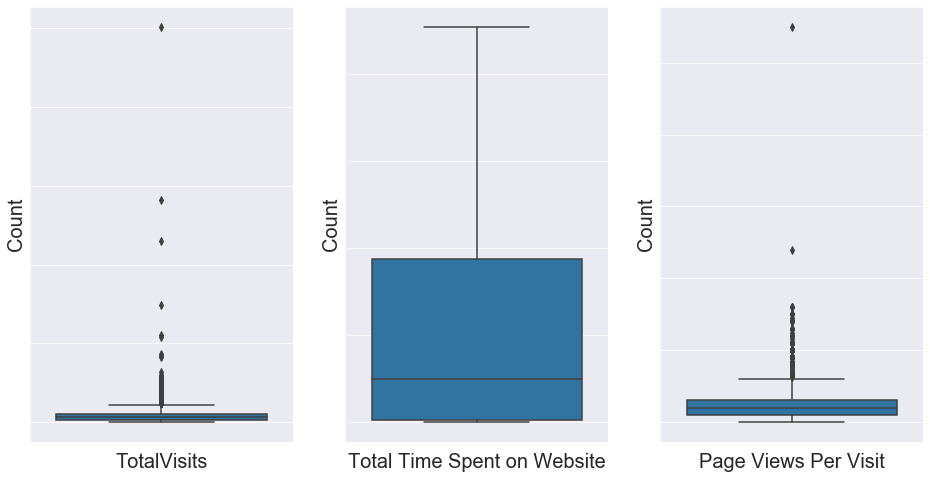

In [264]:
fig=plt.figure(figsize=(16,8))
ax1=fig.add_subplot(1,3,1)
sns.boxplot(y=df['TotalVisits'])
ax1.tick_params(labelleft=False,labelbottom=True,labelsize=22)
ax1.set_xlabel('TotalVisits',fontsize=20)
ax1.set_ylabel('Count',fontsize=20)

ax1=fig.add_subplot(1,3,2)
sns.boxplot(y=df['Total Time Spent on Website'])
ax1.tick_params(labelleft=False,labelbottom=True,labelsize=22)
ax1.set_xlabel('Total Time Spent on Website',fontsize=20)
ax1.set_ylabel('Count',fontsize=20)



ax1=fig.add_subplot(1,3,3)
sns.boxplot(y=df['Page Views Per Visit'])
ax1.tick_params(labelleft=False,labelbottom=True,labelsize=22)
ax1.set_xlabel('Page Views Per Visit',fontsize=20)
ax1.set_ylabel('Count',fontsize=20)

- TotalVisits and Page Views Per Visit have few upper end outliers which need to be taken care of

In [265]:
df.shape

(9204, 13)

In [266]:
df[['TotalVisits','Page Views Per Visit']].quantile([0,0.25,0.75,0.99])

,TotalVisits,Page Views Per Visit
0.00,0.0,0.0
0.25,1.0,1.0
0.75,5.0,3.0
0.99,17.0,9.0


In [267]:
Tv=df['TotalVisits'].quantile(.99)
Pv=df['Page Views Per Visit'].quantile(.99)

In [268]:
df=df[df['TotalVisits']<1.5*Tv]

In [269]:
df=df[df['Page Views Per Visit']<1.5*Pv]

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9165 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9165 non-null   int64  
 1   Lead Origin                             9165 non-null   object 
 2   Lead Source                             9165 non-null   object 
 3   Do Not Email                            9165 non-null   int64  
 4   Converted                               9165 non-null   int64  
 5   TotalVisits                             9165 non-null   int64  
 6   Total Time Spent on Website             9165 non-null   int64  
 7   Page Views Per Visit                    9165 non-null   float64
 8   Last Activity                           9165 non-null   object 
 9   Specialization                          9165 non-null   object 
 10  What is your current occupation         9165 non-null   obje

# Data Analysis

In [271]:
def plotting(type_plot,size,data,title,palette='RdPu',order=None,hue=None,x=None,y=None,hue_order=None):

        if(type_plot=='count'):
            sns.set_style('darkgrid')
            fig=plt.figure(figsize=size)
            ax=fig.add_subplot(1,1,1)
            ax.tick_params(left=False,labelleft=False,labelsize=14)
            plot=sns.countplot(x=x,y=y,data=data, palette=palette,hue=hue,order=order,hue_order=hue_order)
            plt.xlabel(x,fontsize=25)
            plt.ylabel('COUNT',fontsize=25)
            ax.set_title(title,fontsize=30)
            return plot
        
        if(type_plot=='bar'):
            sns.set_style('darkgrid')
            fig=plt.figure(figsize=size)
            ax=fig.add_subplot(1,1,1)
            ax.tick_params(left=False,labelleft=False,labelsize=14)
            sns.barplot(x=x,y=y,data=data, palette=palette,hue=hue,order=order,hue_order=hue_order)
            plt.xlabel(x,fontsize=25)
            plt.ylabel(y,fontsize=25)
            ax.set_title(title,fontsize=30)
            
        if(type_plot=='box'):
            fig=plt.figure(figsize=(18,8))
            ax=fig.add_subplot(1,1,1)
            sns.boxplot(x=x,y=y,data=data,palette="RdPu",hue=hue,order=order,hue_order=hue_order)
            ax.tick_params(left=False,labelleft=False,labelsize=14)
            plt.xlabel(x,fontsize=25)
            plt.ylabel(y,fontsize=25)
            ax.set_title(title,fontsize=30)

Text(0.85, 1    3518
Name: Converted, dtype: int64, '38.39 %')

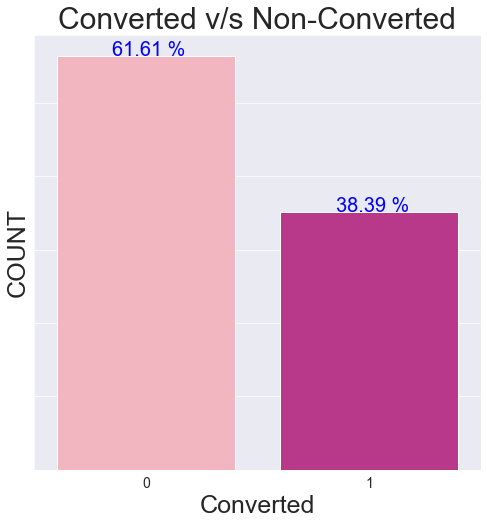

In [272]:
plotting('count',size=(8,8),x='Converted',data=df,title='Converted v/s Non-Converted')
converted_percent=df.loc[df['Converted']==0,'Converted'].value_counts()/len(df)*100
non_converted_percent=df.loc[df['Converted']==1,'Converted'].value_counts()/len(df)*100
plt.text(-0.15,df.loc[df['Converted']==0,'Converted'].value_counts(),r'{0} %'.format(round(converted_percent[0],2)),fontsize=20,c='b')
plt.text(.85,df.loc[df['Converted']==1,'Converted'].value_counts(),r'{0} %'.format(round(non_converted_percent[1],2)),fontsize=20,c='b')


- Imbalance ratio is 61:39

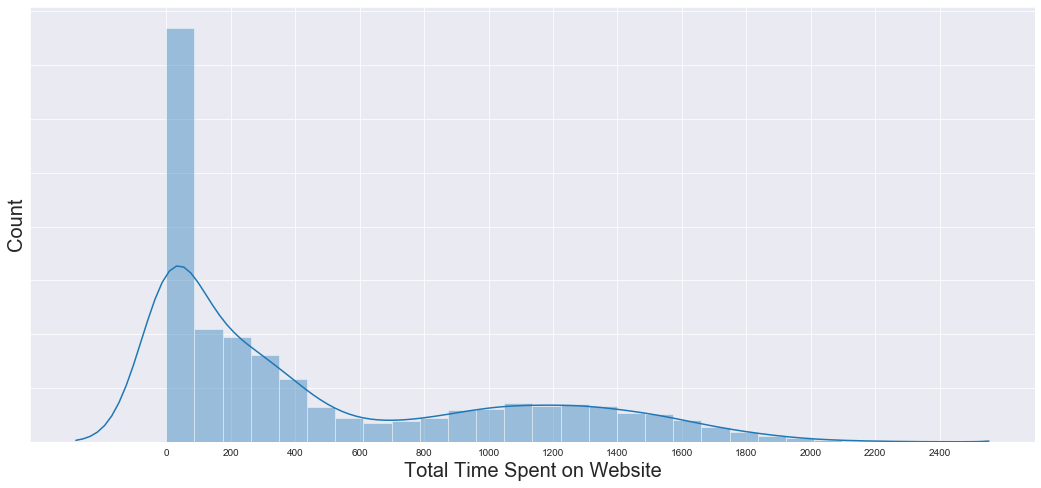

In [273]:
fig=plt.figure(figsize=(18,8))
sns.distplot(df['Total Time Spent on Website'])
plt.xticks(np.arange(0,2500,200))
plt.xlabel('Total Time Spent on Website',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.tick_params(labelleft=False)

- Most of the users spend less than 200 minutes on the website

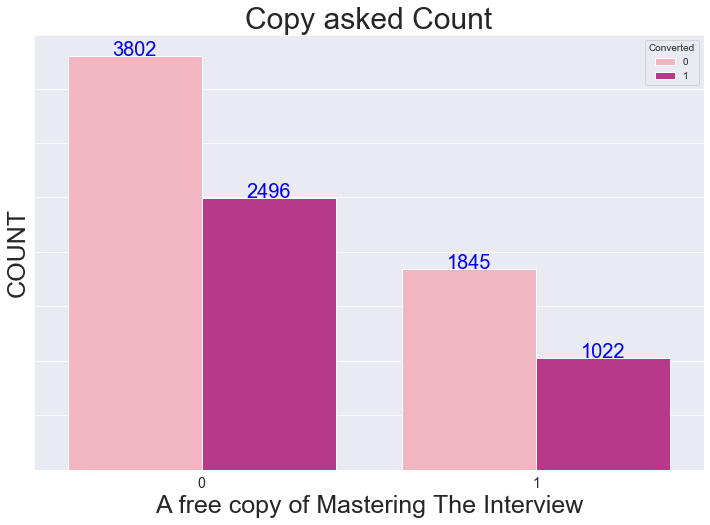

In [274]:
ax=plotting('count',size=(12,8),x='A free copy of Mastering The Interview',hue='Converted',data=df,title='Copy asked Count')
for p in ax.patches:
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0}'.format(round(int(height),2)),
            ha="center",fontsize=20,color='b') 


- People who don't want a copy are more likely to opt for the course

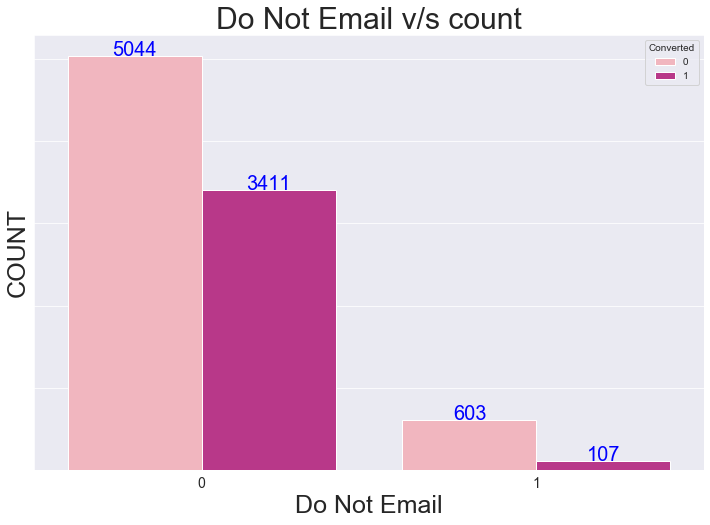

In [275]:
ax=plotting('count',size=(12,8),x='Do Not Email',hue='Converted',data=df,title='Do Not Email v/s count')
for p in ax.patches:
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0}'.format(round(int(height),2)),
            ha="center",fontsize=20,color='b') 

- A call is more likely to be successful if the user has opted for the email service

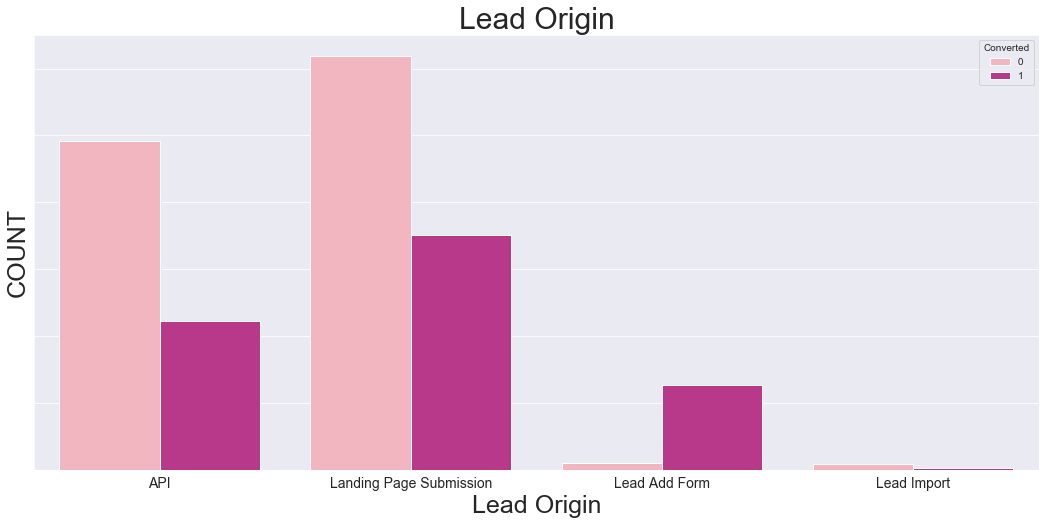

In [276]:
plotting('count',size=(18,8),x='Lead Origin',hue='Converted',title='Lead Origin',data=df)

- Lead Add Form has a great conversion rate

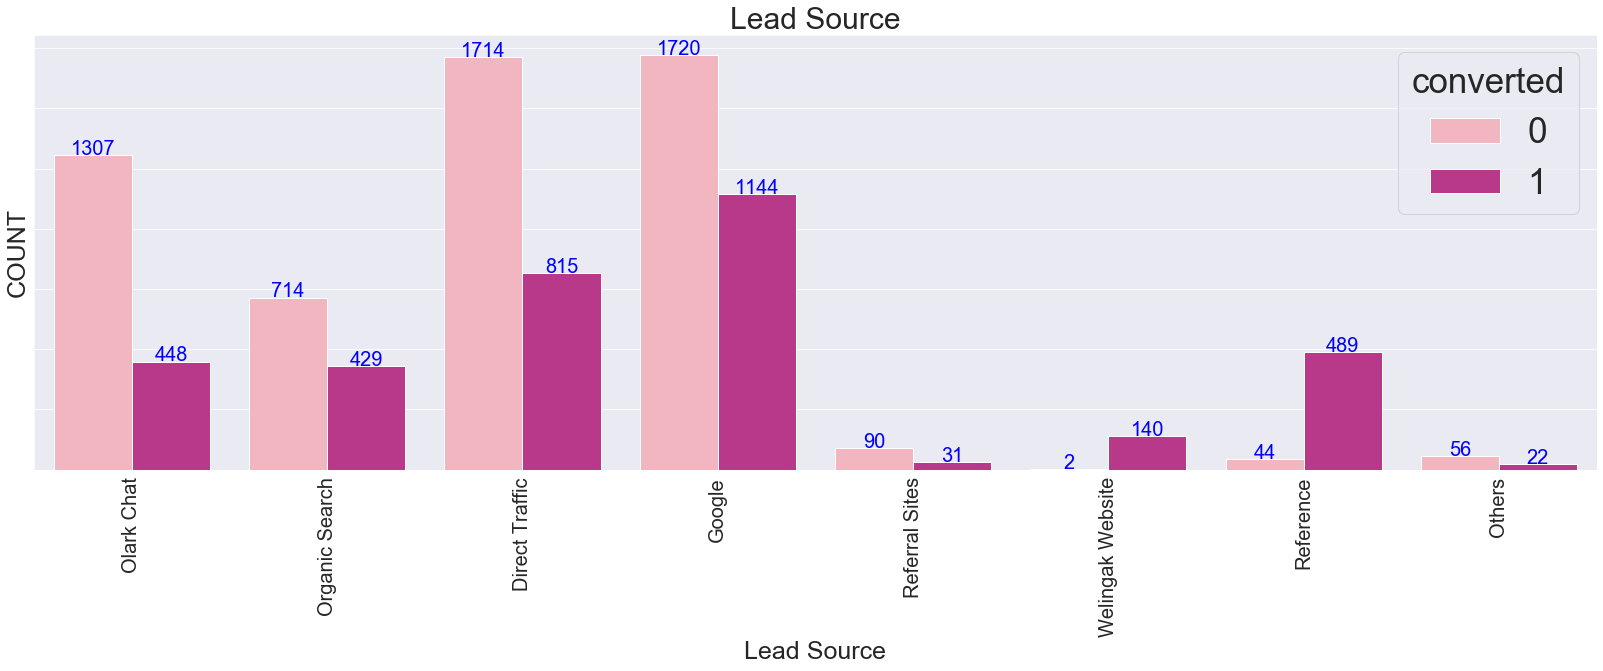

In [277]:
ax=plotting('count',size=(28,8),x='Lead Source',hue='Converted',title='Lead Source',data=df)
plt.tick_params(rotation=90,labelsize=20)

for p in ax.patches:
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0}'.format(int(height)),
            ha="center",fontsize=20,color='b') 
plt.legend(title='converted',fontsize=35,loc='upper right',title_fontsize=35)

- Reference as Lead Source has a high Conversion rate

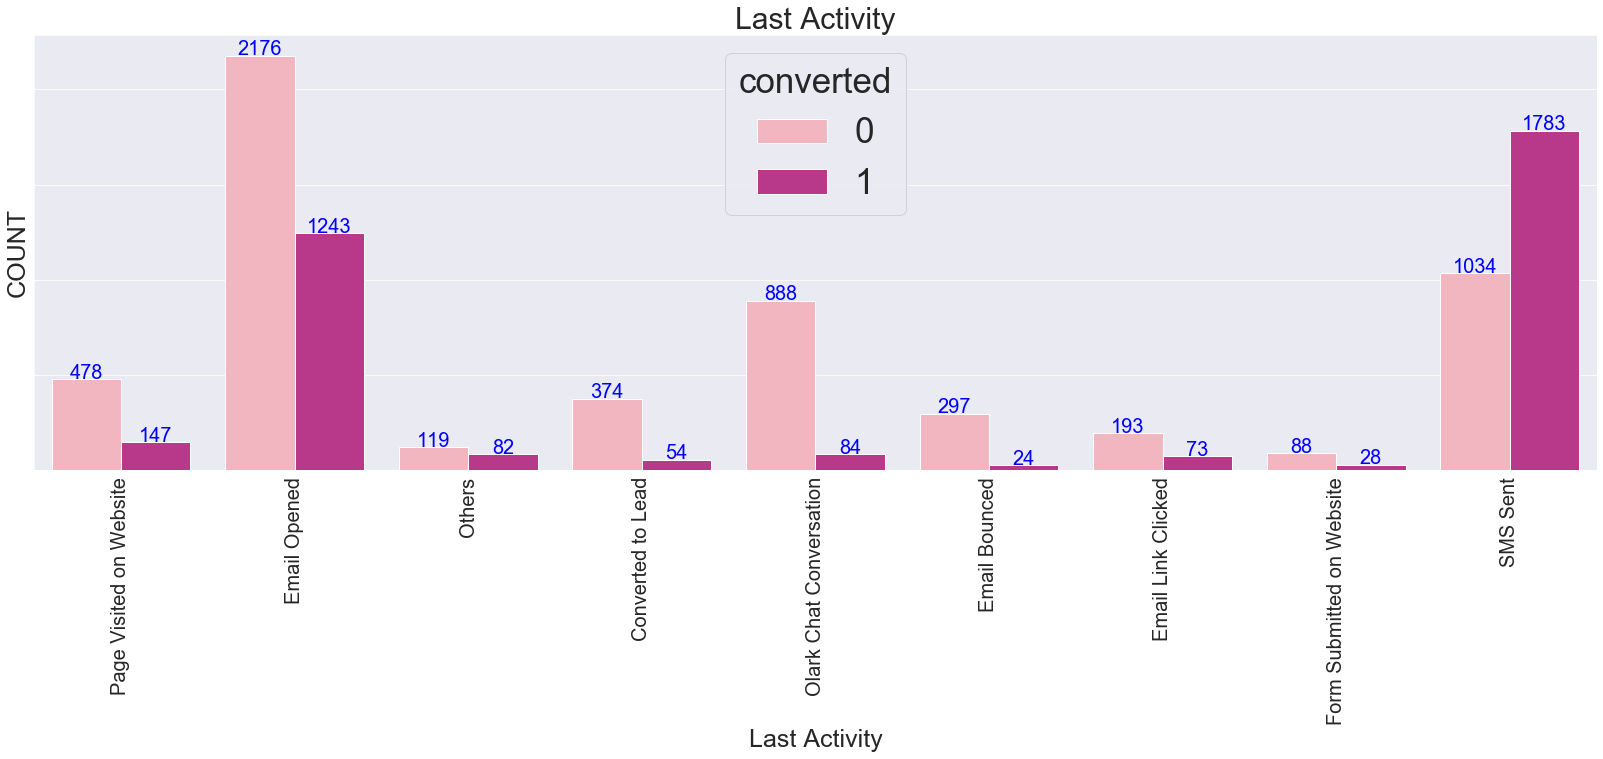

In [278]:
ax=plotting('count',size=(28,8),x='Last Activity',hue='Converted',title='Last Activity',data=df)
plt.tick_params(rotation=90,labelsize=20)

for p in ax.patches:
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0}'.format(int(height)),
            ha="center",fontsize=20,color='b') 
plt.legend(title='converted',fontsize=35,loc='best',title_fontsize=35)

- If people have Sent SMS,then they are most likely to turn out to be a successful lead

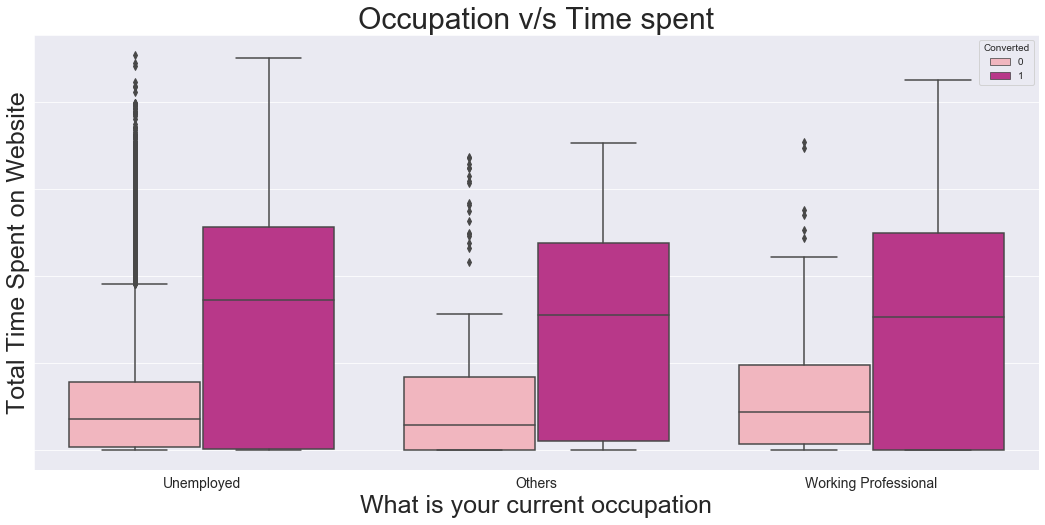

In [279]:
ax=plotting('box',size=(12,8),x='What is your current occupation',y='Total Time Spent on Website',hue='Converted',title='Occupation v/s Time spent',data=df)


- Contrary to the belief, Unemployed and workinf professional are spending equal amount of time on the website.
  More the time spent on the website,better are the chances of conversion

Text(1, 2.794270376432078, 'Average Visit')

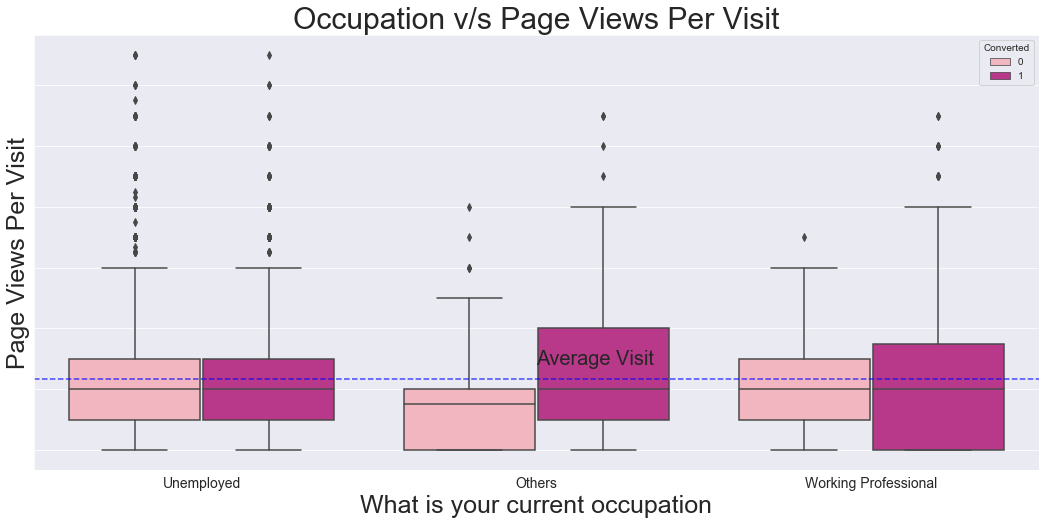

In [280]:
ax=plotting('box',size=(12,8),x='What is your current occupation',y='Page Views Per Visit',hue='Converted',title='Occupation v/s Page Views Per Visit',data=df)
plt.axhline(df['Page Views Per Visit'].mean(),alpha=0.7,c='b',linestyle='--')
plt.text(1,1.2*df['Page Views Per Visit'].mean(),'Average Visit',fontsize=20)

- People falling under 'Others' are more thorough wit their research 

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

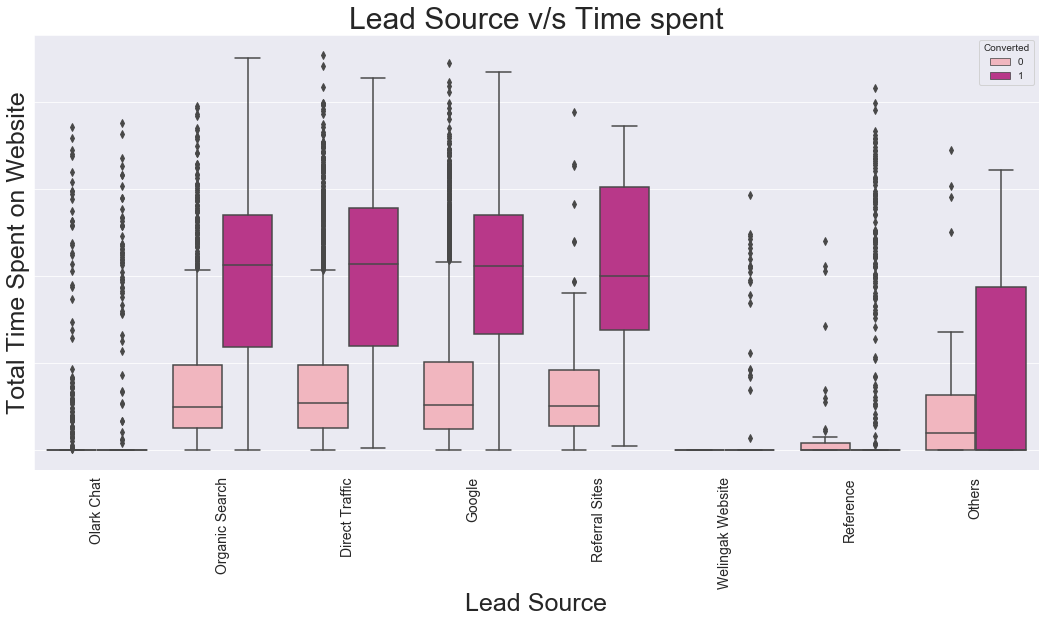

In [281]:
ax=plotting('box',size=(12,8),x='Lead Source',y='Total Time Spent on Website',hue='Converted',title='Lead Source v/s Time spent',data=df)
plt.xticks(rotation=90)

- People who landed on the website via Organic search,google, referral sites and spend significantly more amount of time are most likely to opt for the course

# Data Preparation

- Making a copy of the df so that we can revert back to our original dataframe in case of some alterations

In [282]:
leads=df.copy()

- Getting the dummy variables for categorical variables

In [283]:
cols=df.select_dtypes(include='object').columns

In [284]:
cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [285]:
for c in cols:
    column=pd.get_dummies(df[c],drop_first=True,prefix=c)
    df=pd.concat([df,column],axis=1)
    df.drop(columns=[c],inplace=True)

- Created dummy variables and eleted the original source columns

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9165 entries, 0 to 9239
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9165 non-null   int64  
 1   Do Not Email                                          9165 non-null   int64  
 2   Converted                                             9165 non-null   int64  
 3   TotalVisits                                           9165 non-null   int64  
 4   Total Time Spent on Website                           9165 non-null   int64  
 5   Page Views Per Visit                                  9165 non-null   float64
 6   A free copy of Mastering The Interview                9165 non-null   int64  
 7   Lead Origin_Landing Page Submission                   9165 non-null   uint8  
 8   Lead Origin_Lead Add Form                             9165

# Building Model

#### Train Test split

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
X=df.drop(columns=['Converted','Lead Number'])
Y=df['Converted']

In [289]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=.7,test_size=.3,random_state=50)

#### Standardizing

In [290]:
from sklearn.preprocessing import MinMaxScaler

In [291]:
scaler=MinMaxScaler()

In [292]:
leads.select_dtypes(include=['int64','float64'])

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,660737,0,0,0,0,0.00,0
1,660728,0,0,5,674,2.50,0
2,660727,0,1,2,1532,2.00,1
3,660719,0,0,1,305,1.00,0
4,660681,0,1,2,1428,1.00,0
...,...,...,...,...,...,...,...
9235,579564,1,1,8,1845,2.67,0
9236,579546,0,0,2,238,2.00,1
9237,579545,1,0,2,199,2.00,1
9238,579538,0,1,3,499,3.00,0


In [293]:
X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [294]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5801,0,0.00,0.000000,0.000000,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9213,1,0.20,0.102993,0.192308,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
7489,0,0.40,0.712148,0.153846,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
7002,0,0.00,0.000000,0.000000,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
55,0,0.08,0.005282,0.153846,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


### Looking at correlations

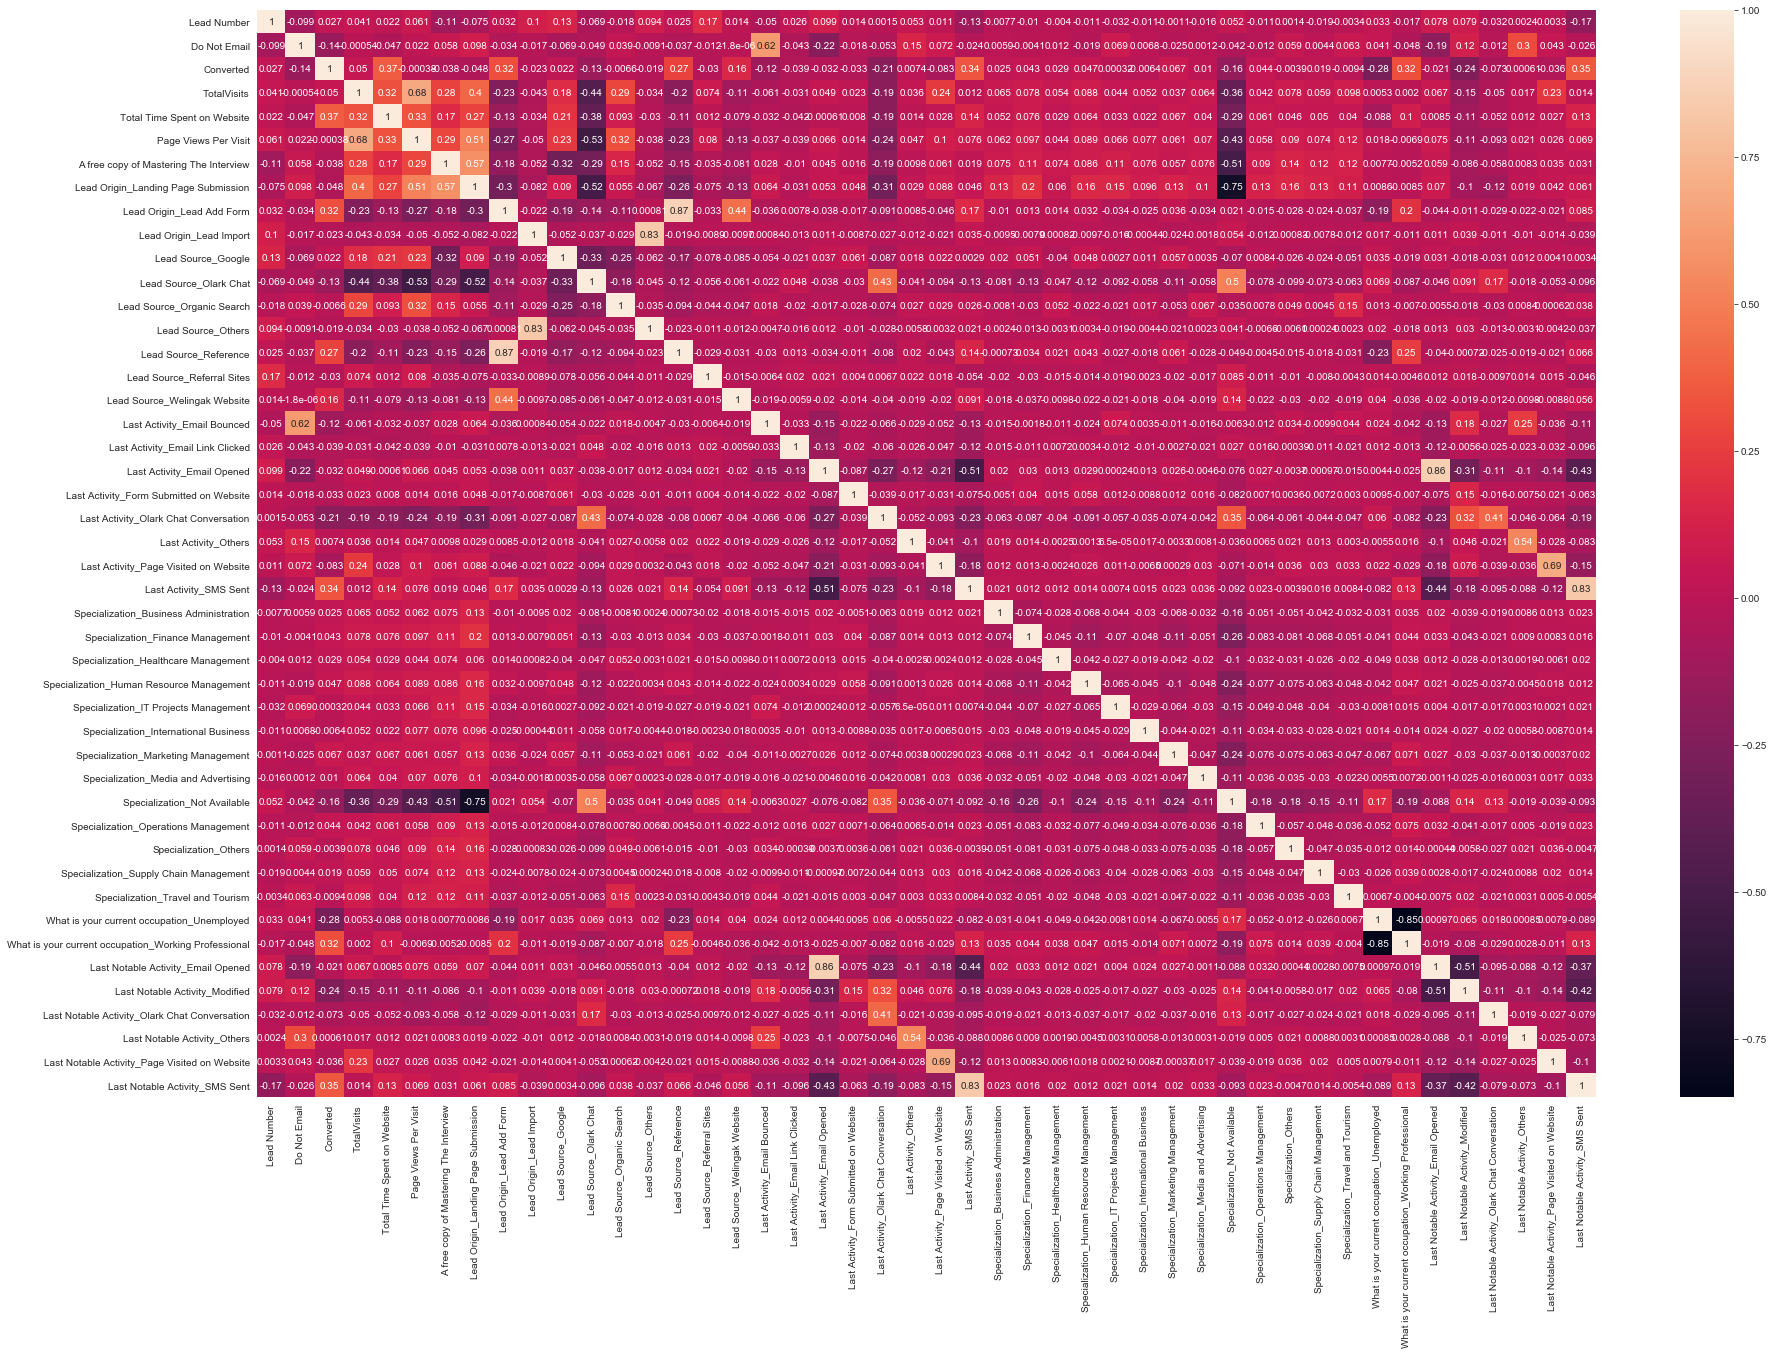

In [295]:
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [296]:
def correlation_table(main_df):
    corr= main_df.corr()
    corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
    corr_df=corr.unstack().reset_index()
    corr_df.columns=["VAR1","VAR2","Correlation"]
    corr_df.dropna(subset=["Correlation"],inplace=True)
    corr_df["Correlation"]=round(corr_df["Correlation"],2)
    corr_df["Correlation"]=corr_df["Correlation"].abs()
    return corr_df.sort_values(by="Correlation",ascending=False).head(10)

In [297]:
correlation_table(df)

,VAR1,VAR2,Correlation
652,Lead Source_Reference,Lead Origin_Lead Add Form,0.87
1859,Last Notable Activity_Email Opened,Last Activity_Email Opened,0.86
1832,What is your current occupation_Working Profes...,What is your current occupation_Unemployed,0.85
607,Lead Source_Others,Lead Origin_Lead Import,0.83
2094,Last Notable Activity_SMS Sent,Last Activity_SMS Sent,0.83
1525,Specialization_Not Available,Lead Origin_Landing Page Submission,0.75
2047,Last Notable Activity_Page Visited on Website,Last Activity_Page Visited on Website,0.69
233,Page Views Per Visit,TotalVisits,0.68
783,Last Activity_Email Bounced,Do Not Email,0.62
328,Lead Origin_Landing Page Submission,A free copy of Mastering The Interview,0.57


#### Using RFE

In [298]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [299]:
rfe=RFE(lr,20)
rfe=rfe.fit(X_train,Y_train)

In [300]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True, False, False,
        True, False, False,  True, False,  True, False,  True,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True, False, False, False,  True,  True,  True])

In [301]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 16),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 23),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 7),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Admi

In [302]:
col=X_train.columns[rfe.support_]

In [303]:
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Not Available',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Others',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

 ###### Running First Training Mode

In [304]:
import statsmodels.api as sm

In [305]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6415
Model:                            GLM   Df Residuals:                     6394
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.1
Date:                Mon, 07 Sep 2020   Deviance:                       5234.3
Time:                        09:51:35   Pearson chi2:                 7.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7733      0.278     -6.390      0.000      -2.317      -1.229
Do Not Email                                            -1.6160      0.198     -8.179      0.000      -2.003      -1.229
TotalVisits                                              1.7784      0.373      4.765      0.000       1.047       2.510
Total Time Spent on Website                              4.5151      0.166     27.261      0.000       4.190       4.840
Page Views Per Visit                                    -1.3623      0.346     -3.934      0.000      -2.041      -0.684
Lead Origin_Landing Page Submission                     -1.0188      0.127     -8.051      0.000      -1.267      -0.771
Lead Origin_Lead Add Form                                2.3370      1.123      2.082      0.037       0.137       4.537
Lead Source_Olark Chat                                   1.0373      0.135      7.676      0.000       0.772       1.302
Lead Source_Reference                                    0.8228      1.136      0.725      0.469      -1.403       3.049
Lead Source_Welingak Website                             3.3246      1.335      2.491      0.013       0.708       5.941
Last Activity_Email Link Clicked                         0.4136      0.252      1.639      0.101      -0.081       0.908
Last Activity_Email Opened                               0.9691      0.136      7.132      0.000       0.703       1.235
Last Activity_Olark Chat Conversation                   -0.5930      0.206     -2.879      0.004      -0.997      -0.189
Last Activity_Others                                     0.9652      0.304      3.175      0.001       0.369       1.561
Last Activity_SMS Sent                                   0.9708      0.179      5.427      0.000       0.620       1.321
Specialization_Not Available                            -1.1307      0.123     -9.189      0.000      -1.372      -0.890
What is your current occupation_Unemployed              -0.4250      0.215     -1.980      0.048      -0.846      -0.004
What is your current occupation_Working Professional     2.1853      0.283      7.733      0.000       1.631       2.739
Last Notable Activity_Others                             1.6564      0.354      4.679      0.000       0.963       2.350
Last Notable Activity_Page Visited on Website            0.5848      0.229      2.555      0.011       0.136       1.033
Last Notable Activity_SMS Sent                           1.5495      0.146     10.611      0.000       1.263       1.836
========================================================================================================================
"""

- Removing Lead Source_Reference since it has a high P value

In [306]:
col=col.drop('Lead Source_Reference')

 ###### Running Second Training Mode

In [307]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6415
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.4
Date:                Mon, 07 Sep 2020   Deviance:                       5234.7
Time:                        09:51:35   Pearson chi2:                 7.85e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7724      0.277     -6.389      0.000      -2.316      -1.229
Do Not Email                                            -1.6142      0.197     -8.175      0.000      -2.001      -1.227
TotalVisits                                              1.7783      0.373      4.765      0.000       1.047       2.510
Total Time Spent on Website                              4.5144      0.166     27.256      0.000       4.190       4.839
Page Views Per Visit                                    -1.3626      0.346     -3.935      0.000      -2.041      -0.684
Lead Origin_Landing Page Submission                     -1.0185      0.127     -8.049      0.000      -1.267      -0.771
Lead Origin_Lead Add Form                                3.1401      0.224     14.028      0.000       2.701       3.579
Lead Source_Olark Chat                                   1.0360      0.135      7.663      0.000       0.771       1.301
Lead Source_Welingak Website                             2.5199      0.752      3.353      0.001       1.047       3.993
Last Activity_Email Link Clicked                         0.4154      0.252      1.647      0.100      -0.079       0.910
Last Activity_Email Opened                               0.9691      0.136      7.132      0.000       0.703       1.235
Last Activity_Olark Chat Conversation                   -0.5925      0.206     -2.876      0.004      -0.996      -0.189
Last Activity_Others                                     0.9662      0.304      3.179      0.001       0.371       1.562
Last Activity_SMS Sent                                   0.9725      0.179      5.438      0.000       0.622       1.323
Specialization_Not Available                            -1.1298      0.123     -9.183      0.000      -1.371      -0.889
What is your current occupation_Unemployed              -0.4260      0.215     -1.986      0.047      -0.846      -0.006
What is your current occupation_Working Professional     2.1848      0.283      7.734      0.000       1.631       2.739
Last Notable Activity_Others                             1.6548      0.354      4.676      0.000       0.961       2.348
Last Notable Activity_Page Visited on Website            0.5849      0.229      2.556      0.011       0.136       1.033
Last Notable Activity_SMS Sent                           1.5475      0.146     10.604      0.000       1.261       1.834
========================================================================================================================
"""

- Last Activity_Email Link Clicked has high P value hence removing it

In [308]:
col=col.drop('Last Activity_Email Link Clicked')

 ###### Running Third Training Mode

In [309]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6415
Model:                            GLM   Df Residuals:                     6396
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.7
Date:                Mon, 07 Sep 2020   Deviance:                       5237.4
Time:                        09:51:35   Pearson chi2:                 7.86e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6802      0.270     -6.213      0.000      -2.210      -1.150
Do Not Email                                            -1.6397      0.196     -8.349      0.000      -2.025      -1.255
TotalVisits                                              1.7925      0.373      4.804      0.000       1.061       2.524
Total Time Spent on Website                              4.5090      0.165     27.255      0.000       4.185       4.833
Page Views Per Visit                                    -1.3534      0.346     -3.912      0.000      -2.032      -0.675
Lead Origin_Landing Page Submission                     -1.0165      0.126     -8.036      0.000      -1.264      -0.769
Lead Origin_Lead Add Form                                3.1655      0.224     14.152      0.000       2.727       3.604
Lead Source_Olark Chat                                   1.0535      0.135      7.808      0.000       0.789       1.318
Lead Source_Welingak Website                             2.5339      0.752      3.368      0.001       1.060       4.008
Last Activity_Email Opened                               0.8717      0.121      7.232      0.000       0.635       1.108
Last Activity_Olark Chat Conversation                   -0.6958      0.195     -3.565      0.000      -1.078      -0.313
Last Activity_Others                                     0.8949      0.299      2.989      0.003       0.308       1.482
Last Activity_SMS Sent                                   0.8766      0.168      5.224      0.000       0.548       1.205
Specialization_Not Available                            -1.1257      0.123     -9.151      0.000      -1.367      -0.885
What is your current occupation_Unemployed              -0.4298      0.214     -2.006      0.045      -0.850      -0.010
What is your current occupation_Working Professional     2.1729      0.282      7.711      0.000       1.621       2.725
Last Notable Activity_Others                             1.6241      0.352      4.618      0.000       0.935       2.313
Last Notable Activity_Page Visited on Website            0.4894      0.220      2.220      0.026       0.057       0.921
Last Notable Activity_SMS Sent                           1.5476      0.146     10.601      0.000       1.261       1.834
========================================================================================================================
"""

In [310]:
#Checking VIFs

In [311]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [312]:
vif=pd.DataFrame()
vif['Column']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Column,VIF
13,What is your current occupation_Unemployed,13.41
11,Last Activity_SMS Sent,6.41
4,Lead Origin_Landing Page Submission,5.87
3,Page Views Per Visit,5.76
1,TotalVisits,4.35
17,Last Notable Activity_SMS Sent,4.22
12,Specialization_Not Available,3.84
8,Last Activity_Email Opened,3.50
6,Lead Source_Olark Chat,2.62
2,Total Time Spent on Website,2.27


- What is your current occupation_Unemployed has high VIF hence removing it

In [313]:
col=col.drop('What is your current occupation_Unemployed')

 ###### Running fourth Training Mode

In [314]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6415
Model:                            GLM   Df Residuals:                     6397
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2620.7
Date:                Mon, 07 Sep 2020   Deviance:                       5241.3
Time:                        09:51:35   Pearson chi2:                 7.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0950      0.175    -11.973      0.000      -2.438      -1.752
Do Not Email                                            -1.6416      0.197     -8.352      0.000      -2.027      -1.256
TotalVisits                                              1.8050      0.373      4.840      0.000       1.074       2.536
Total Time Spent on Website                              4.5133      0.165     27.285      0.000       4.189       4.838
Page Views Per Visit                                    -1.3597      0.346     -3.932      0.000      -2.037      -0.682
Lead Origin_Landing Page Submission                     -1.0190      0.126     -8.059      0.000      -1.267      -0.771
Lead Origin_Lead Add Form                                3.1788      0.223     14.226      0.000       2.741       3.617
Lead Source_Olark Chat                                   1.0586      0.135      7.847      0.000       0.794       1.323
Lead Source_Welingak Website                             2.5173      0.752      3.347      0.001       1.043       3.992
Last Activity_Email Opened                               0.8727      0.121      7.240      0.000       0.636       1.109
Last Activity_Olark Chat Conversation                   -0.6881      0.195     -3.528      0.000      -1.070      -0.306
Last Activity_Others                                     0.8834      0.299      2.951      0.003       0.297       1.470
Last Activity_SMS Sent                                   0.8671      0.168      5.173      0.000       0.539       1.196
Specialization_Not Available                            -1.1338      0.123     -9.216      0.000      -1.375      -0.893
What is your current occupation_Working Professional     2.5893      0.191     13.555      0.000       2.215       2.964
Last Notable Activity_Others                             1.6244      0.352      4.617      0.000       0.935       2.314
Last Notable Activity_Page Visited on Website            0.4918      0.220      2.231      0.026       0.060       0.924
Last Notable Activity_SMS Sent                           1.5493      0.146     10.621      0.000       1.263       1.835
========================================================================================================================
"""

In [315]:
vif=pd.DataFrame()
vif['Column']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Column,VIF
11,Last Activity_SMS Sent,6.09
3,Page Views Per Visit,5.55
1,TotalVisits,4.32
16,Last Notable Activity_SMS Sent,4.22
4,Lead Origin_Landing Page Submission,3.98
8,Last Activity_Email Opened,3.05
12,Specialization_Not Available,2.72
6,Lead Source_Olark Chat,2.34
2,Total Time Spent on Website,2.20
9,Last Activity_Olark Chat Conversation,1.89


- Last Activity_SMS Sent has high VIF hence removing it

In [316]:
col=col.drop('Last Activity_SMS Sent')

 ###### Running fifth Training Mode

In [317]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6415
Model:                            GLM   Df Residuals:                     6398
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2634.0
Date:                Mon, 07 Sep 2020   Deviance:                       5267.9
Time:                        09:51:35   Pearson chi2:                 7.61e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8091      0.163    -11.131      0.000      -2.128      -1.491
Do Not Email                                            -1.6951      0.195     -8.684      0.000      -2.078      -1.313
TotalVisits                                              1.7902      0.372      4.807      0.000       1.060       2.520
Total Time Spent on Website                              4.5302      0.165     27.479      0.000       4.207       4.853
Page Views Per Visit                                    -1.2378      0.343     -3.609      0.000      -1.910      -0.566
Lead Origin_Landing Page Submission                     -1.0118      0.126     -8.042      0.000      -1.258      -0.765
Lead Origin_Lead Add Form                                3.2905      0.223     14.760      0.000       2.854       3.727
Lead Source_Olark Chat                                   1.0819      0.134      8.046      0.000       0.818       1.346
Lead Source_Welingak Website                             2.5777      0.756      3.411      0.001       1.097       4.059
Last Activity_Email Opened                               0.5429      0.098      5.549      0.000       0.351       0.735
Last Activity_Olark Chat Conversation                   -1.0157      0.182     -5.576      0.000      -1.373      -0.659
Last Activity_Others                                     0.6394      0.291      2.194      0.028       0.068       1.211
Specialization_Not Available                            -1.1148      0.122     -9.107      0.000      -1.355      -0.875
What is your current occupation_Working Professional     2.5732      0.189     13.581      0.000       2.202       2.945
Last Notable Activity_Others                             1.4923      0.345      4.321      0.000       0.815       2.169
Last Notable Activity_Page Visited on Website            0.1710      0.210      0.816      0.415      -0.240       0.582
Last Notable Activity_SMS Sent                           2.0894      0.107     19.591      0.000       1.880       2.298
========================================================================================================================
"""

- Last Notable Activity_Page Visited on Website has high P value

In [318]:
col=col.drop('Last Notable Activity_Page Visited on Website')

 ###### Running sixth Training Mode

In [319]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6415
Model:                            GLM   Df Residuals:                     6399
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2634.3
Date:                Mon, 07 Sep 2020   Deviance:                       5268.6
Time:                        09:51:35   Pearson chi2:                 7.61e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7912      0.161    -11.137      0.000      -2.106      -1.476
Do Not Email                                            -1.6965      0.195     -8.691      0.000      -2.079      -1.314
TotalVisits                                              1.8813      0.356      5.288      0.000       1.184       2.579
Total Time Spent on Website                              4.5283      0.165     27.474      0.000       4.205       4.851
Page Views Per Visit                                    -1.2778      0.340     -3.762      0.000      -1.943      -0.612
Lead Origin_Landing Page Submission                     -1.0093      0.126     -8.026      0.000      -1.256      -0.763
Lead Origin_Lead Add Form                                3.2890      0.223     14.761      0.000       2.852       3.726
Lead Source_Olark Chat                                   1.0865      0.134      8.086      0.000       0.823       1.350
Lead Source_Welingak Website                             2.5761      0.755      3.411      0.001       1.096       4.057
Last Activity_Email Opened                               0.5169      0.092      5.603      0.000       0.336       0.698
Last Activity_Olark Chat Conversation                   -1.0425      0.179     -5.822      0.000      -1.394      -0.692
Last Activity_Others                                     0.6204      0.290      2.138      0.033       0.052       1.189
Specialization_Not Available                            -1.1120      0.122     -9.090      0.000      -1.352      -0.872
What is your current occupation_Working Professional     2.5733      0.189     13.584      0.000       2.202       2.945
Last Notable Activity_Others                             1.4792      0.345      4.293      0.000       0.804       2.154
Last Notable Activity_SMS Sent                           2.0644      0.102     20.261      0.000       1.865       2.264
========================================================================================================================
"""

In [320]:
vif=pd.DataFrame()
vif['Column']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Column,VIF
3,Page Views Per Visit,5.37
1,TotalVisits,3.92
4,Lead Origin_Landing Page Submission,3.71
11,Specialization_Not Available,2.53
8,Last Activity_Email Opened,2.29
6,Lead Source_Olark Chat,2.23
2,Total Time Spent on Website,2.15
14,Last Notable Activity_SMS Sent,1.86
9,Last Activity_Olark Chat Conversation,1.68
13,Last Notable Activity_Others,1.53


- Page Views Per Visit has high VIF hence removing it

In [321]:
col=col.drop('Page Views Per Visit')


 ###### Running Seventh Training Mode

In [322]:
X_train_sm=sm.add_constant(X_train[col])
logm7=sm.GLM(Y_train,X_train_sm,family=sm.families.Binomial())
res=logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6415
Model:                            GLM   Df Residuals:                     6400
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.5
Date:                Mon, 07 Sep 2020   Deviance:                       5283.0
Time:                        09:51:35   Pearson chi2:                 7.72e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9412      0.156    -12.433      0.000      -2.247      -1.635
Do Not Email                                            -1.7020      0.195     -8.738      0.000      -2.084      -1.320
TotalVisits                                              1.2209      0.309      3.948      0.000       0.615       1.827
Total Time Spent on Website                              4.5253      0.165     27.459      0.000       4.202       4.848
Lead Origin_Landing Page Submission                     -1.0371      0.125     -8.279      0.000      -1.283      -0.792
Lead Origin_Lead Add Form                                3.4319      0.220     15.606      0.000       3.001       3.863
Lead Source_Olark Chat                                   1.2331      0.129      9.565      0.000       0.980       1.486
Lead Source_Welingak Website                             2.5664      0.755      3.399      0.001       1.086       4.047
Last Activity_Email Opened                               0.4850      0.092      5.289      0.000       0.305       0.665
Last Activity_Olark Chat Conversation                   -1.0623      0.179     -5.933      0.000      -1.413      -0.711
Last Activity_Others                                     0.5703      0.290      1.967      0.049       0.002       1.138
Specialization_Not Available                            -1.0805      0.122     -8.870      0.000      -1.319      -0.842
What is your current occupation_Working Professional     2.5787      0.189     13.615      0.000       2.208       2.950
Last Notable Activity_Others                             1.4786      0.345      4.291      0.000       0.803       2.154
Last Notable Activity_SMS Sent                           2.0195      0.101     20.036      0.000       1.822       2.217
========================================================================================================================
"""

In [323]:
vif=pd.DataFrame()
vif['Column']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Column,VIF
3,Lead Origin_Landing Page Submission,3.24
1,TotalVisits,2.63
10,Specialization_Not Available,2.46
7,Last Activity_Email Opened,2.22
2,Total Time Spent on Website,2.14
5,Lead Source_Olark Chat,2.14
13,Last Notable Activity_SMS Sent,1.81
8,Last Activity_Olark Chat Conversation,1.67
12,Last Notable Activity_Others,1.53
4,Lead Origin_Lead Add Form,1.44


- P values and VIFs are suitable. Hence continuing with this model

## Heatmap of our variables

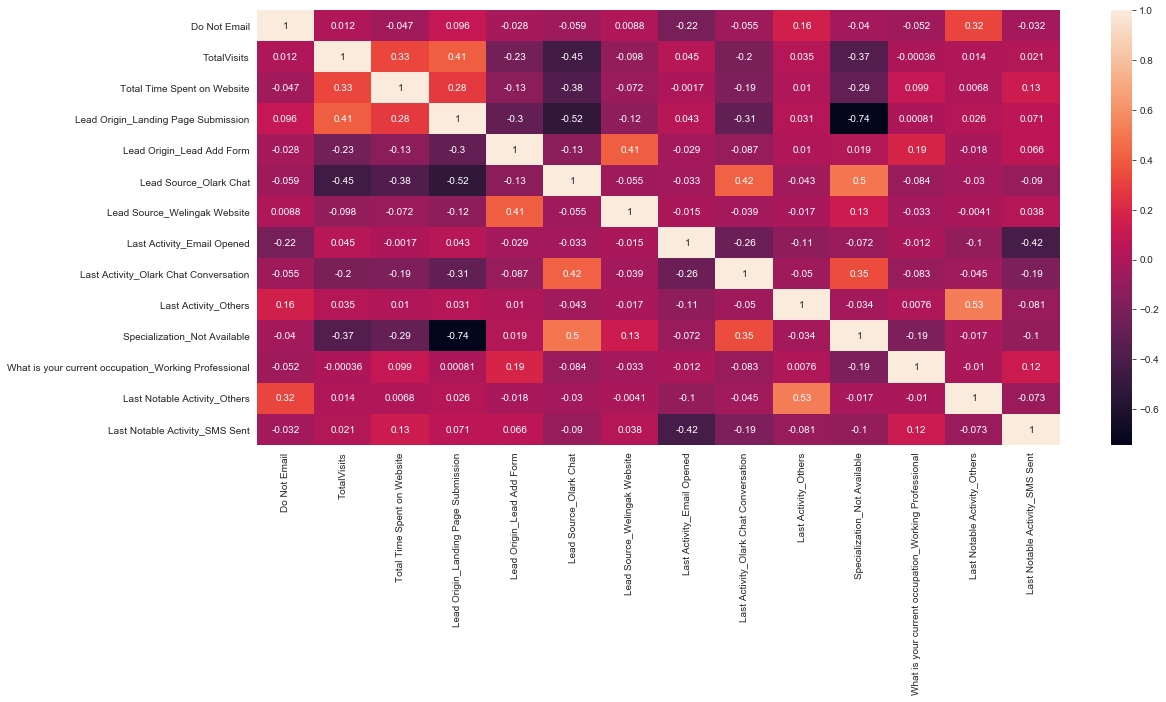

In [324]:
fig=plt.figure(figsize=(18,8))
sns.heatmap(X_train[col].corr(),annot=True)

### Sorting values based on the coefficient

In [325]:
coef=pd.Series(res.params[1:]).sort_values(ascending=False)
coef=coef.rename_axis("Variable")
coef

Variable
Total Time Spent on Website                             4.525301
Lead Origin_Lead Add Form                               3.431948
What is your current occupation_Working Professional    2.578713
Lead Source_Welingak Website                            2.566425
Last Notable Activity_SMS Sent                          2.019515
Last Notable Activity_Others                            1.478603
Lead Source_Olark Chat                                  1.233066
TotalVisits                                             1.220898
Last Activity_Others                                    0.570297
Last Activity_Email Opened                              0.484974
Lead Origin_Landing Page Submission                    -1.037134
Last Activity_Olark Chat Conversation                  -1.062319
Specialization_Not Available                           -1.080461
Do Not Email                                           -1.702030
dtype: float64

Text(0.5, 0, 'Variables')

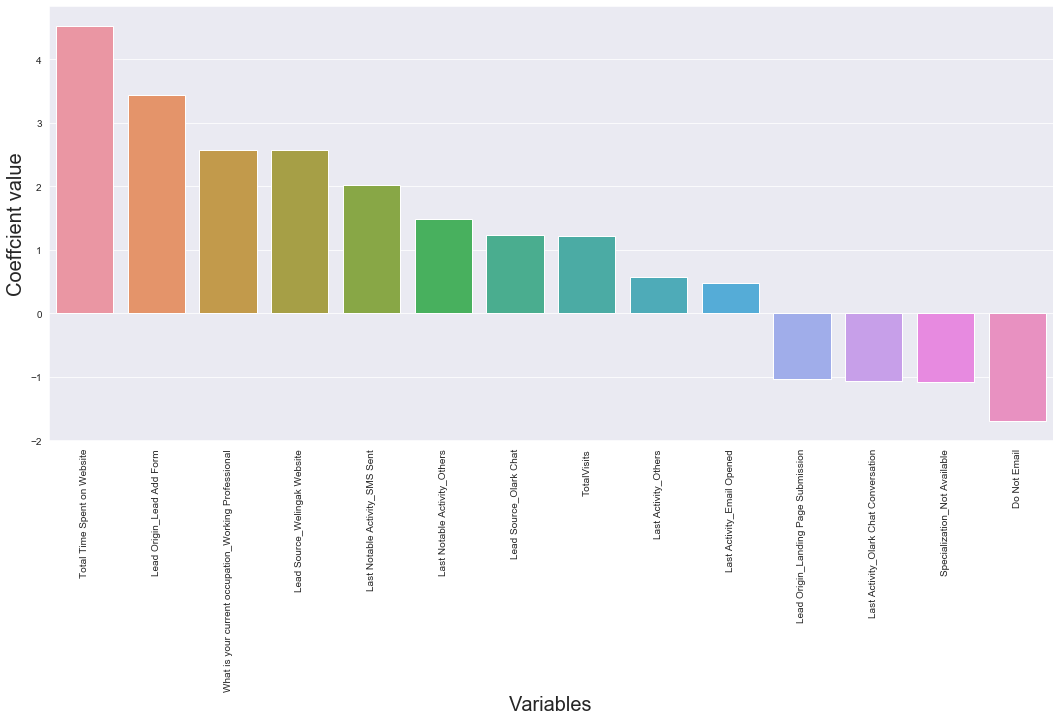

In [326]:
fig=plt.figure(figsize=(18,8))
ax=fig.add_subplot(1,1,1)
sns.barplot(x=coef.index,y=coef.values)
plt.xticks(rotation=90)
ax.set_ylabel('Coeffcient value',fontsize=20)
ax.set_xlabel('Variables',fontsize=20)

##### Adding the predicted values column

In [327]:
from sklearn import metrics

In [328]:
y_train_pred=res.predict(X_train_sm)

In [329]:
Y_train_pred = pd.DataFrame({'Converted':Y_train.values, 'Converted_Prob':y_train_pred})
Y_train_pred['prospectID'] = Y_train.index
Y_train_pred.head()

,Converted,Converted_Prob,prospectID
5801,1,0.997737,5801
9213,0,0.018521,9213
7489,1,0.854434,7489
7002,0,0.213551,7002
55,0,0.082025,55


In [330]:
Y_train_pred['Converted_pred']=np.where(Y_train_pred['Converted_Prob']>.5,1,0)

In [331]:
Y_train_pred.head()

,Converted,Converted_Prob,prospectID,Converted_pred
5801,1,0.997737,5801,1
9213,0,0.018521,9213,0
7489,1,0.854434,7489,1
7002,0,0.213551,7002,0
55,0,0.082025,55,0


- Alloting a score based on the converted probability

In [332]:
Y_train_pred['Lead_Score']=Y_train_pred['Converted_Prob']*100

In [333]:
Y_train_pred.head()

,Converted,Converted_Prob,prospectID,Converted_pred,Lead_Score
5801,1,0.997737,5801,1,99.773733
9213,0,0.018521,9213,0,1.852127
7489,1,0.854434,7489,1,85.443439
7002,0,0.213551,7002,0,21.355111
55,0,0.082025,55,0,8.202515


 ## Checking accuracy and other metrics

In [334]:
#confusion metrics
confusion = metrics.confusion_matrix(Y_train_pred['Converted'], Y_train_pred['Converted_pred'] )
print(confusion)

[[3458  466]
 [ 725 1766]]


In [335]:
# Predicted     not_converted    converted
# Actual
# not_converted        3458        466
# converted            725         1766

###### Accuracy

In [336]:

print(metrics.accuracy_score(Y_train_pred['Converted'], Y_train_pred['Converted_pred']))

0.8143413873733437


###### Sensitivity

In [337]:
TP=confusion[1][1]
FP=confusion[0][1]
FN=confusion[1][0]
TN=confusion[0][0]

In [338]:
sensitivity=TP/(TP+FN)
round(sensitivity,2)

0.71

###### Specificity

In [339]:
specificity=TN/(TN+FP)
round(specificity,2)

0.88

# Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [340]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [341]:
fpr, tpr, thresholds = metrics.roc_curve(Y_train_pred.Converted, Y_train_pred.Converted_Prob, drop_intermediate = False )

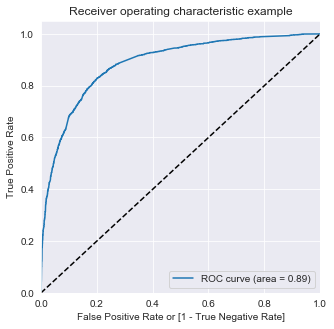

In [342]:
draw_roc(Y_train_pred.Converted, Y_train_pred.Converted_Prob)

## Optimal cut-off point

- An optimal cut off point is the balanced value or a middle value which proficiently calculates sensitivity and specificity

In [343]:
x=np.arange(0,1,.1,)
for i in x:
    Y_train_pred[round(i,2)]=np.where(Y_train_pred['Converted_Prob']>i,1,0)

In [344]:
Y_train_pred.head()

,Converted,Converted_Prob,prospectID,Converted_pred,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5801,1,0.997737,5801,1,99.773733,1,1,1,1,1,1,1,1,1,1
9213,0,0.018521,9213,0,1.852127,1,0,0,0,0,0,0,0,0,0
7489,1,0.854434,7489,1,85.443439,1,1,1,1,1,1,1,1,1,0
7002,0,0.213551,7002,0,21.355111,1,1,1,0,0,0,0,0,0,0
55,0,0.082025,55,0,8.202515,1,0,0,0,0,0,0,0,0,0


#### Calculating sensitivity and specificity for various probaility cutoffs

In [345]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in x:
    confusion=metrics.confusion_matrix(Y_train_pred['Converted'],Y_train_pred[i])
    TP=confusion[1][1]
    FP=confusion[0][1]
    FN=confusion[1][0]
    TN=confusion[0][0]
    
    
    accuracy=(TP+TN)/(TP+FP+TN+FN)
    specificity=TN/(TN+FP)
    sensitivity=TP/(TP+FN)
    
    cutoff_df.loc[i] =[i,accuracy,sensitivity,specificity]
    
    

In [346]:
cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.388309,1.000000,0.000000
0.1,0.1,0.608106,0.970695,0.377931
0.2,0.2,0.748246,0.918105,0.640418
0.3,0.3,0.800468,0.857086,0.764526
0.4,0.4,0.814653,0.793657,0.827982
0.5,0.5,0.814341,0.708952,0.881244
0.6,0.6,0.800624,0.603372,0.925841
0.7,0.7,0.784723,0.523083,0.950815
0.8,0.8,0.759470,0.430751,0.968145
0.9,0.9,0.714731,0.285026,0.987513


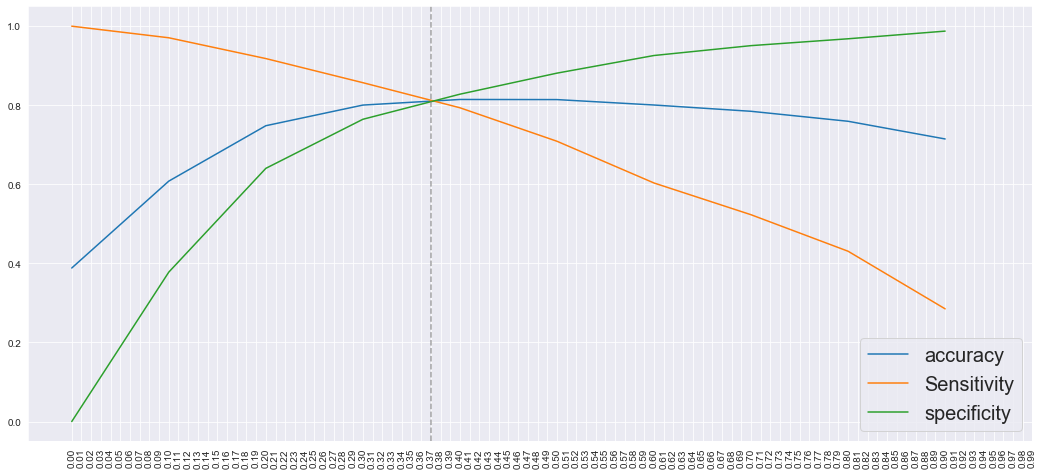

In [347]:
fig=plt.figure(figsize=(18,8))
ax=fig.add_subplot(1,1,1)
ax.plot(cutoff_df['prob'], cutoff_df['accuracy'],label='accuracy')
ax.plot(cutoff_df['prob'], cutoff_df['sensitivity'],label='Sensitivity')
ax.plot(cutoff_df['prob'], cutoff_df['specificity'],label='specificity')
plt.xticks(np.arange(0,1,.01),rotation=90)
ax.axvline(.37,alpha=0.7,c='gray',linestyle='--')
plt.legend(loc="best",fontsize=20)
plt.show()


- .37 seems to be the cut-off point . But our Aim is to prioritise sensitivity and accuracy as our coversion needs to be around 80%. Company aims to increase the conversion rate of the leads. Hence going with the cut off value 0.3 as our sensitivity is above 80% without comprimising our accuracy. .3 also seems to give us a decent specificity which is our 3rd priority

In [348]:
Y_train_pred['final_predicted']=np.where(Y_train_pred['Converted_Prob']>.3,1,0)

In [349]:
Y_train_pred.head()

,Converted,Converted_Prob,prospectID,Converted_pred,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
5801,1,0.997737,5801,1,99.773733,1,1,1,1,1,1,1,1,1,1,1
9213,0,0.018521,9213,0,1.852127,1,0,0,0,0,0,0,0,0,0,0
7489,1,0.854434,7489,1,85.443439,1,1,1,1,1,1,1,1,1,0,1
7002,0,0.213551,7002,0,21.355111,1,1,1,0,0,0,0,0,0,0,0
55,0,0.082025,55,0,8.202515,1,0,0,0,0,0,0,0,0,0,0


In [350]:
confusion = metrics.confusion_matrix(Y_train_pred['Converted'], Y_train_pred['final_predicted'] )

confusion


[[3183,  741],
       [ 461, 2030]]

[[3183, 741], [461, 2030]]

In [351]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0]

In [352]:
accuracy=(TP+TN)/(TP+FP+TN+FN)
specificity=TN/(TN+FP)
sensitivity=TP/(TP+FN)
FPR=FP/(TN+FP)
TPR=TP / (TP+FP)

print('Accuracy is {0}'.format(accuracy))
print('specificity is {0}'.format(specificity))
print('sensitivity is {0}'.format(sensitivity))
print('FPR is {0}'.format(FPR))
print('TPR is {0}'.format(TPR))

Accuracy is 0.8004676539360873
specificity is 0.764525993883792
sensitivity is 0.8570855078281815
FPR is 0.23547400611620795
TPR is 0.6979405034324943


## Precision and Recall

In [353]:
##### Precision
TP /(TP + FP)

0.6979405034324943

In [354]:
##### Recall
TP /(TP + FN)

0.8570855078281815

### Precision and recall tradeoff

In [355]:
from sklearn.metrics import precision_recall_curve

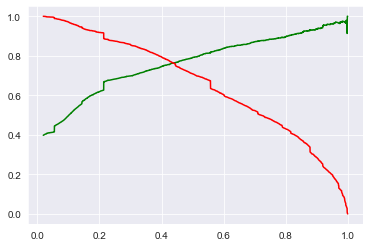

In [356]:
p, r, thresholds = precision_recall_curve(Y_train_pred['Converted'], Y_train_pred['Converted_Prob'])

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set

In [357]:
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [358]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Specialization_Not Available,What is your current occupation_Working Professional,Last Notable Activity_Others,Last Notable Activity_SMS Sent
4811,0,0.08,0.328345,0,0,0,0,1,0,0,1,0,0,0
2606,0,0.24,0.688820,1,0,0,0,0,0,0,0,0,0,0
8394,0,0.16,0.565141,1,0,0,0,0,0,1,0,0,0,0
7068,0,0.16,0.001320,1,0,0,0,0,0,0,0,0,0,1
7695,0,0.12,0.754842,1,0,0,0,1,0,0,0,0,0,0


In [359]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 4811 to 7522
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2750 non-null   int64  
 1   TotalVisits                                           2750 non-null   float64
 2   Total Time Spent on Website                           2750 non-null   float64
 3   Lead Origin_Landing Page Submission                   2750 non-null   uint8  
 4   Lead Origin_Lead Add Form                             2750 non-null   uint8  
 5   Lead Source_Olark Chat                                2750 non-null   uint8  
 6   Lead Source_Welingak Website                          2750 non-null   uint8  
 7   Last Activity_Email Opened                            2750 non-null   uint8  
 8   Last Activity_Olark Chat Conversation                 2

In [360]:
X_test_sm=sm.add_constant(X_test)

In [361]:
Y_test_pred=res.predict(X_test_sm)

In [362]:
Y_test_pred.head()

4811    0.278245
2606    0.606297
8394    0.585334
7068    0.319183
7695    0.744407
dtype: float64

In [363]:
## Converting it into  a dataframe
Y_test_pred=pd.DataFrame(Y_test_pred)

In [364]:
Y_test_pred.head()

,0
4811,0.278245
2606,0.606297
8394,0.585334
7068,0.319183
7695,0.744407


- Renaming the column

In [365]:
Y_test_pred=Y_test_pred.rename(columns={0:'Converted_prob'})

In [366]:
#Creating another dataframe with the original converted value
Y_test_df=pd.DataFrame(Y_test)

In [367]:
Y_test_df['prospectID']=Y_test_df.index

In [368]:
Y_test_df

,Converted,prospectID
4811,0,4811
2606,0,2606
8394,1,8394
7068,0,7068
7695,0,7695
...,...,...
1578,1,1578
6069,1,6069
6528,1,6528
301,1,301


In [369]:
#Joining the 2 dataframes

Y_test_df=pd.concat([Y_test_df,Y_test_pred],axis=1)

In [370]:
Y_test_df

,Converted,prospectID,Converted_prob
4811,0,4811,0.278245
2606,0,2606,0.606297
8394,1,8394,0.585334
7068,0,7068,0.319183
7695,0,7695,0.744407
...,...,...,...
1578,1,1578,0.983200
6069,1,6069,0.433055
6528,1,6528,0.680323
301,1,301,0.168273


- Re-arranging the columns

In [371]:
Y_test_df = Y_test_df[['prospectID','Converted','Converted_prob']]

- Resetting the index

In [372]:
Y_test_df=Y_test_df.reset_index(drop=True)

- Converting predicting probabilities to 1/0 based on the threshold

In [373]:
Y_test_df['final_predicted']=np.where(Y_test_df['Converted_prob']>.3,1,0)

In [374]:
Y_test_df.head()

,prospectID,Converted,Converted_prob,final_predicted
0,4811,0,0.278245,0
1,2606,0,0.606297,1
2,8394,1,0.585334,1
3,7068,0,0.319183,1
4,7695,0,0.744407,1


In [375]:
# Assigning scores based on Converted_prob

Y_test_df['Lead_score']=round(Y_test_df['Converted_prob']*100,2)

In [376]:
Y_test_df.head()

,prospectID,Converted,Converted_prob,final_predicted,Lead_score
0,4811,0,0.278245,0,27.82
1,2606,0,0.606297,1,60.63
2,8394,1,0.585334,1,58.53
3,7068,0,0.319183,1,31.92
4,7695,0,0.744407,1,74.44


In [377]:
confusion2 = metrics.confusion_matrix(Y_test_df['Converted'] , Y_test_df['final_predicted'])
confusion2


array([[1340,  383],
       [ 178,  849]], dtype=int64)

In [378]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [379]:
accuracy=(TP+TN)/(TP+FP+TN+FN)
specificity=TN/(TN+FP)
sensitivity=TP/(TP+FN)
FPR=FP/(TN+FP)
TPR=TP / (TP+FP)

print('Accuracy is {0}'.format(round(accuracy,2)))
print('specificity is {0}'.format(round(specificity,2)))
print('sensitivity is {0}'.format(round(sensitivity,2)))
print('FPR is {0}'.format(FPR))
print('TPR is {0}'.format(TPR))

Accuracy is 0.8
specificity is 0.78
sensitivity is 0.83
FPR is 0.22228670922809055
TPR is 0.6891233766233766


In [380]:
Y_test_df['final_predicted'].value_counts()

0    1518
1    1232
Name: final_predicted, dtype: int64

## Precision and recall for our test set

In [381]:
# precision
precision=metrics.precision_score(Y_test_df['Converted'], Y_test_df['final_predicted'])
print('precision ',round(precision,2))

# recall
recall=metrics.recall_score(Y_test_df['Converted'], Y_test_df['final_predicted'])
print('recall ',round(recall,2))

precision  0.69
recall  0.83


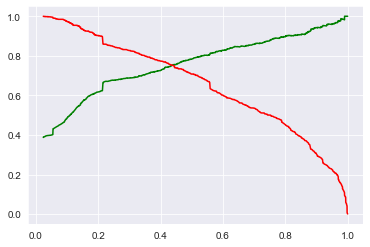

In [382]:
p, r, thresholds = precision_recall_curve(Y_test_df['Converted'], Y_test_df['Converted_prob'])

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Final Thoughts:-


1)Our optimal cut off value came out to be .37 but because of our business needs, we proceeded with .3

2)specificity is 0.78 and sensitivity is 0.83 for our test set which isn't far from our train set

3) Accuracy for our test set is 80% 

4)Precision came out to be .69 and recall .83

5)Over-all our model seems to be decent